## Part (d)

In [51]:
import random
import matplotlib.pyplot as plt
import math
import numpy

In [54]:
l = 5
tau = 1
m = 2

N = 10 ** 3
num_walks = 10 ** 4


def sample_r(t):
    '''
    Returns a list of r(t) of list num_walks
    '''
    dt = t / N
    sqrt_dt = math.sqrt(dt)
    r_list = []
    
    for walk in range(num_walks):
        r = 0
        for step in range(N):
            dW = numpy.random.normal(0, sqrt_dt)
            dr = (l - r) / tau * dt + m * l * dW
            r += dr
        r_list.append(r)
    return r_list


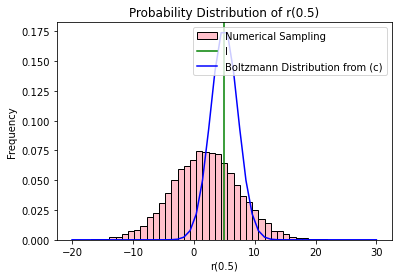

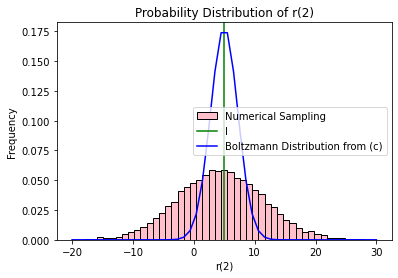

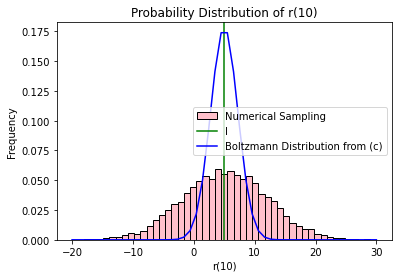

In [55]:
def pdf(r):
    var = tau * m * m * l * l
    return math.exp(- (r - l) ** 2 / var) / math.sqrt(var * math.pi)

times = [0.5 * tau, 2 * tau, 10 * tau]

for t in times:
    x_coords = numpy.linspace(-20, 30, 50)
    r_list = sample_r(t)
    weights = numpy.divide(numpy.ones_like(r_list), len(r_list))
    plt.hist(r_list, weights=weights, bins = x_coords, color = "pink", edgecolor = "black", label = "Numerical Sampling")
    plt.axvline(x = 5, color = "green", label = "l")
    theoretical_y = [pdf(x) for x in x_coords]
    plt.plot(x_coords, theoretical_y, color = "blue", label = "Boltzmann Distribution from (c)")
    plt.title(f"Probability Distribution of r({t})")
    plt.xlabel(f"r({t})")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

I end up setting $N = 10^3$ and $N_{walk} = 10^4$. The conditions for convergence I looked for are that the probability plots of $r(t)$ tend towards $l = 5$ (the green line in my plot) as $t$ increases, which should occur as per part (b). Moreover, I check to see that my plots roughly resemble a Boltzmann distribution, especially as $t$ increases relative to $\tau$ as it should as per part (c). Note that the theoretical Boltzmann calculation (which I plotted in blue) is a lot less noisy that our random walk. We thus have more variation and so the theoretical Bolztmann distribution from part (c) ends up appearing steeper than our numerically generated results.